<a href="https://colab.research.google.com/github/saichandboyapati/vrsec-pytorch/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries and Generate Non-Linear Data

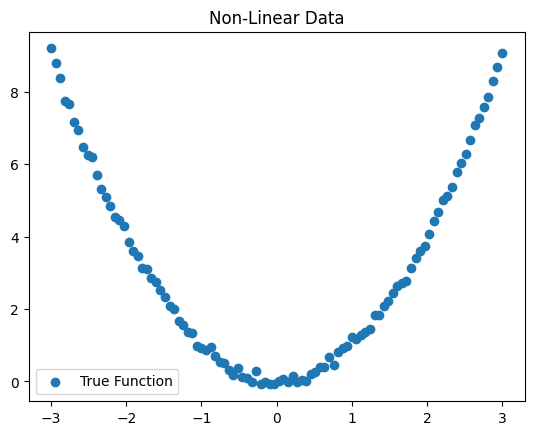

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generate non-linear data (parabolic function)
torch.manual_seed(42)
X = torch.linspace(-3, 3, 100).reshape(-1, 1)
y = X**2 + 0.1 * torch.randn(X.shape)  # Quadratic function with noise

plt.scatter(X.numpy(), y.numpy(), label="True Function")
plt.legend()
plt.title("Non-Linear Data")
plt.show()

# 2.Define a Simple Linear Model (Underfitting)

In [2]:
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Single-layer (too simple for non-linear data)

    def forward(self, x):
        return self.linear(x)

# Initialize model, loss function, and optimizer
model = SimpleLinearModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


3.Train the Model

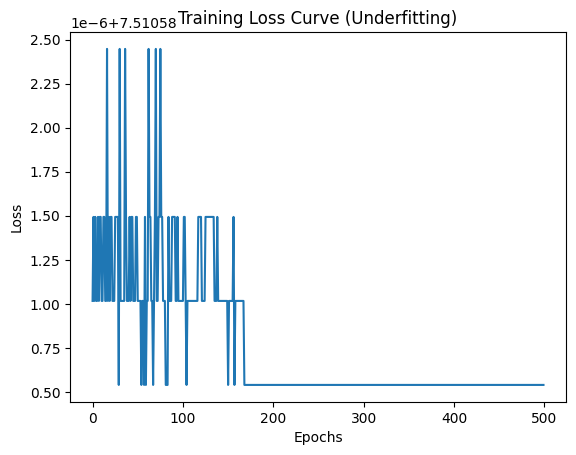

In [5]:
epochs = 500
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve (Underfitting)")
plt.show()

4.Visualizing the Model’s Predictions

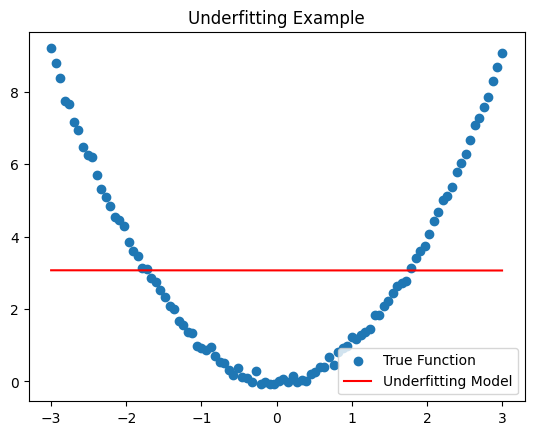

In [4]:
with torch.no_grad():
    y_pred = model(X)

plt.scatter(X.numpy(), y.numpy(), label="True Function")
plt.plot(X.numpy(), y_pred.numpy(), color='red', label="Underfitting Model")
plt.legend()
plt.title("Underfitting Example")
plt.show()

Define a complex Linear Model(Overfitting[link text](https://)

# Define a complex Linear Model(Overfitting[link text](https://)

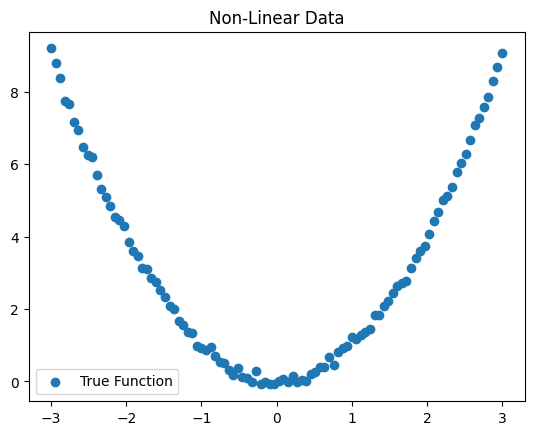

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generate non-linear data (quadratic function)
torch.manual_seed(42)
X = torch.linspace(-3, 3, 100).reshape(-1, 1)
y = X**2 + 0.1 * torch.randn(X.shape)  # Quadratic function with noise

# Split into training and validation sets
X_train, y_train = X[:80], y[:80]   # 80% for training
X_val, y_val = X[80:], y[80:]       # 20% for validation

# Plot data
plt.scatter(X.numpy(), y.numpy(), label="True Function")
plt.legend()
plt.title("Non-Linear Data")
plt.show()

Define a Complex Neural Network (Overfitting)

In [15]:
class OverfittingModel(nn.Module):
    def __init__(self):
        super(OverfittingModel, self).__init__()
        self.fc1 = nn.Linear(1, 100)  # Too many neurons
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 100)
        self.fc4 = nn.Linear(100, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return self.fc4(x)

# Initialize model, loss function, and optimizer
model = OverfittingModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Train the Model (Observe Overfitting)

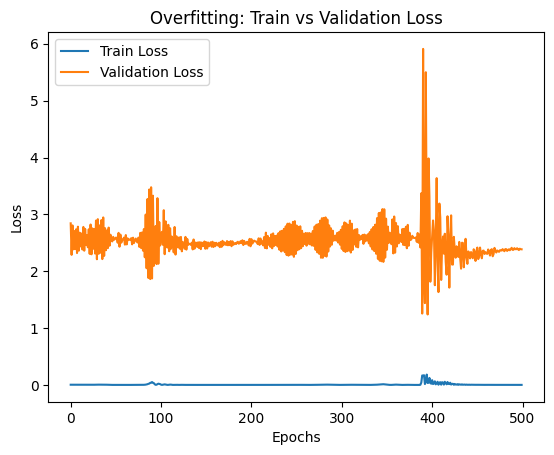

In [23]:
pochs = 1000
train_losses, val_losses = [], []

for epoch in range(epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    y_train_pred = model(X_train)
    train_loss = criterion(y_train_pred, y_train)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Validation phase
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = criterion(y_val_pred, y_val)
        val_losses.append(val_loss.item())

# Plot training vs validation loss
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Overfitting: Train vs Validation Loss")
plt.show()

#Training loss keeps decreasing (model memorizes data).

#Validation loss increases after a point (poor generalization).

Visualizing Overfitting

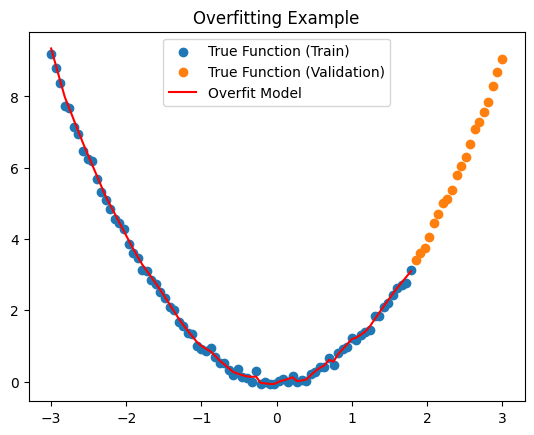

In [22]:
with torch.no_grad():
    y_train_pred = model(X_train)
    y_val_pred = model(X_val)

plt.scatter(X_train.numpy(), y_train.numpy(), label="True Function (Train)")
plt.scatter(X_val.numpy(), y_val.numpy(), label="True Function (Validation)")
plt.plot(X_train.numpy(), y_train_pred.numpy(), color='red', label="Overfit Model")
plt.legend()
plt.title("Overfitting Example")
plt.show()

#The model fits training data perfectly but fails on validation data.